<a href="https://colab.research.google.com/github/saidul-mondal-au7/Yes_Bank_Stock_Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Saidul Mondal
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

To determine the YES bank's stock’s future value on the national stock exchange by making machine learning model of linear regression. The advantage of a successful prediction of a stock's future price could results insignificant profit. The efficient market hypothesis recommends that stock costs mirror all right now accessible data and any value changes that are not founded on recently uncovered data subsequently are an  unpredictable. We have to build model which help us to predict the future stock closing prices.

# **GitHub Link -**

https://github.com/saidul-mondal-au7/Yes_Bank_Stock_Closing_Price_Prediction

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [83]:
# Import Libraries
import numpy as np                                     # numerical computations
import pandas as pd                                    # data manipulations
from numpy import math

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 
from datetime import datetime 

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.preprocessing import StandardScaler      # Standarization/Scaling data
from sklearn.linear_model import LinearRegression      # regression model

from sklearn import metrics
from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

<ipython-input-83-23f85f1baa8a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Yes_bank_Stock_closing_ml_project/"
raw_data = pd.read_csv(path + "data_YesBank_StockPrices.csv")

Mounted at /content/drive


In [4]:
df = raw_data.copy()

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
shape = df.shape
print('Number of rows {} \n Number of columns {}'.format(shape[0],shape[1]))

Number of rows 185 
 Number of columns 5


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,Date,0
1,Open,0
2,High,0
3,Low,0
4,Close,0


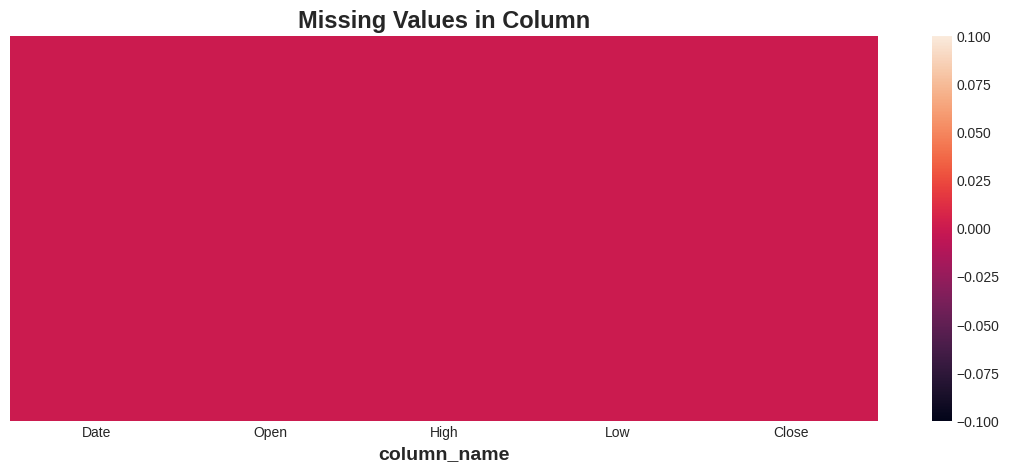

In [10]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?

*  We have a total of 185 rows and 5 columns. <br>
*  Dataset is too small.
*  No null values. <br>
*  Date column is of 'object' datatype we have to convert it to 'datetime'.<br>


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

**1.Date**-Stock price date<br>
**2.Open**-Openning price of the stock<br>
**3.High**-Highest price of that day<br>
**4.Low**-Lowest price of that day<br>
**5.Close**-Closing price of that day

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
type(df['Date'][0])
# converting string format of 'Date' column into date-time format
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
# df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [15]:
# setting date column as an index
df.set_index('Date',inplace=True)
df.index.freq = 'MS'

### What all manipulations have you done and insights you found?

1. I converted string format of 'Date' column into date-time format.
2. Set the date as index


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

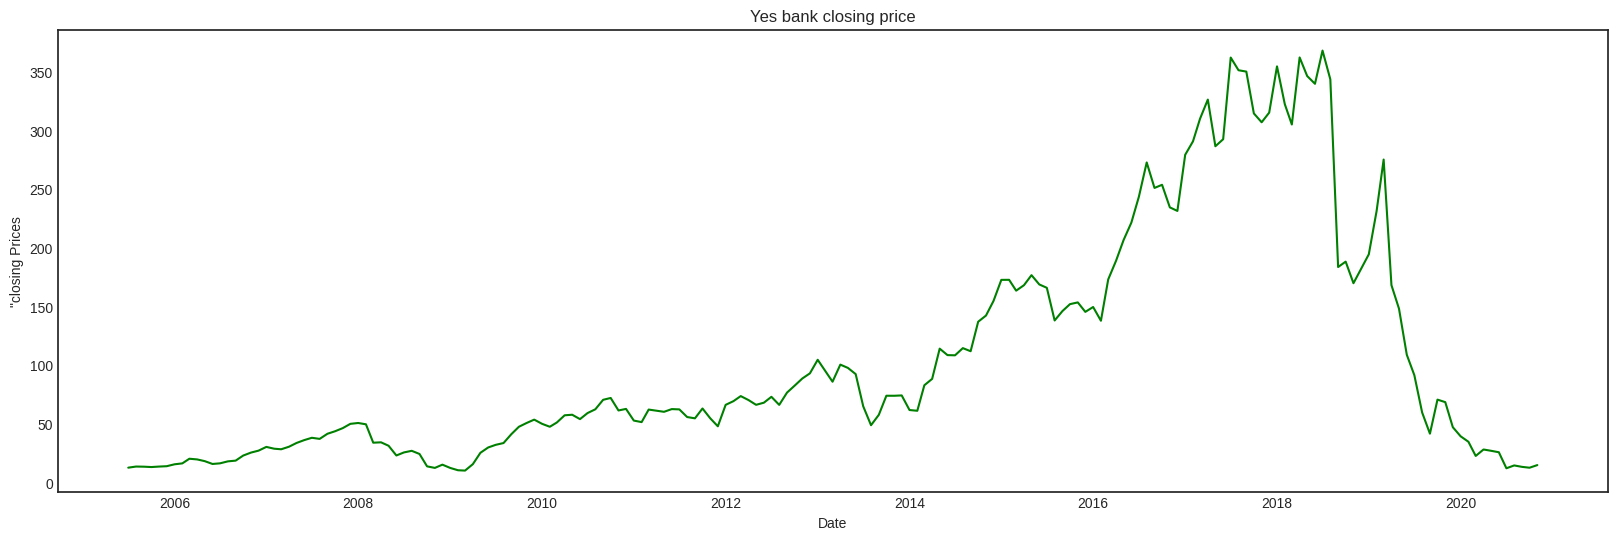

In [16]:
# Chart - 1 visualization code
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('"closing Prices')
plt.plot(df['Close'], color="green")
plt.title('Yes bank closing price')
plt.show()

##### 1. Why did you pick the specific chart?

For checking the closing price activities all over data set

##### 2. What is/are the insight(s) found from the chart?

*   Here in the above graph we can see from approx 2006 to 2020 stock close prise.<br>
* 2018 is the highest pick point.<br>
* stock close prise suddenly decreased after year 2018-2019.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* From starting to 2017 it is looking good for invesment.<br>
* The free fall reason is mainly because of Rana Kapoor case and hitted the stock price badly.


#### Chart - 2

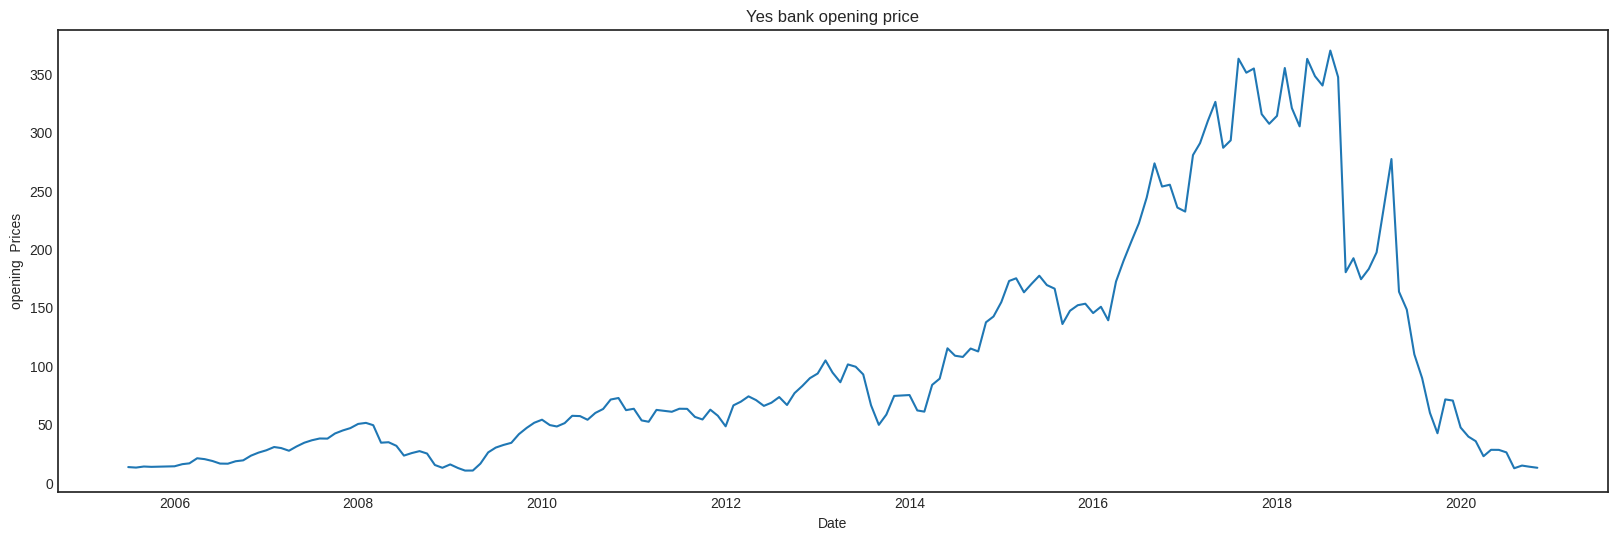

In [17]:
# Chart - 2 visualization code
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('opening  Prices')
plt.plot(df['Open'])
plt.title('Yes bank opening price')
plt.show()

##### 1. Why did you pick the specific chart?

For checking the openning price all over the dataset

##### 2. What is/are the insight(s) found from the chart?

*   So here in this graph, we can observe that the graph for Yes bank opening price and Yes bank closing price has same result.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Opening price also started increasing in year 2014 and it was at peak in year 2018. But after 2018 it started falling down contineously and came at 0 in year 2020 exactly same as Yes bank closing price.

#### Chart - 3

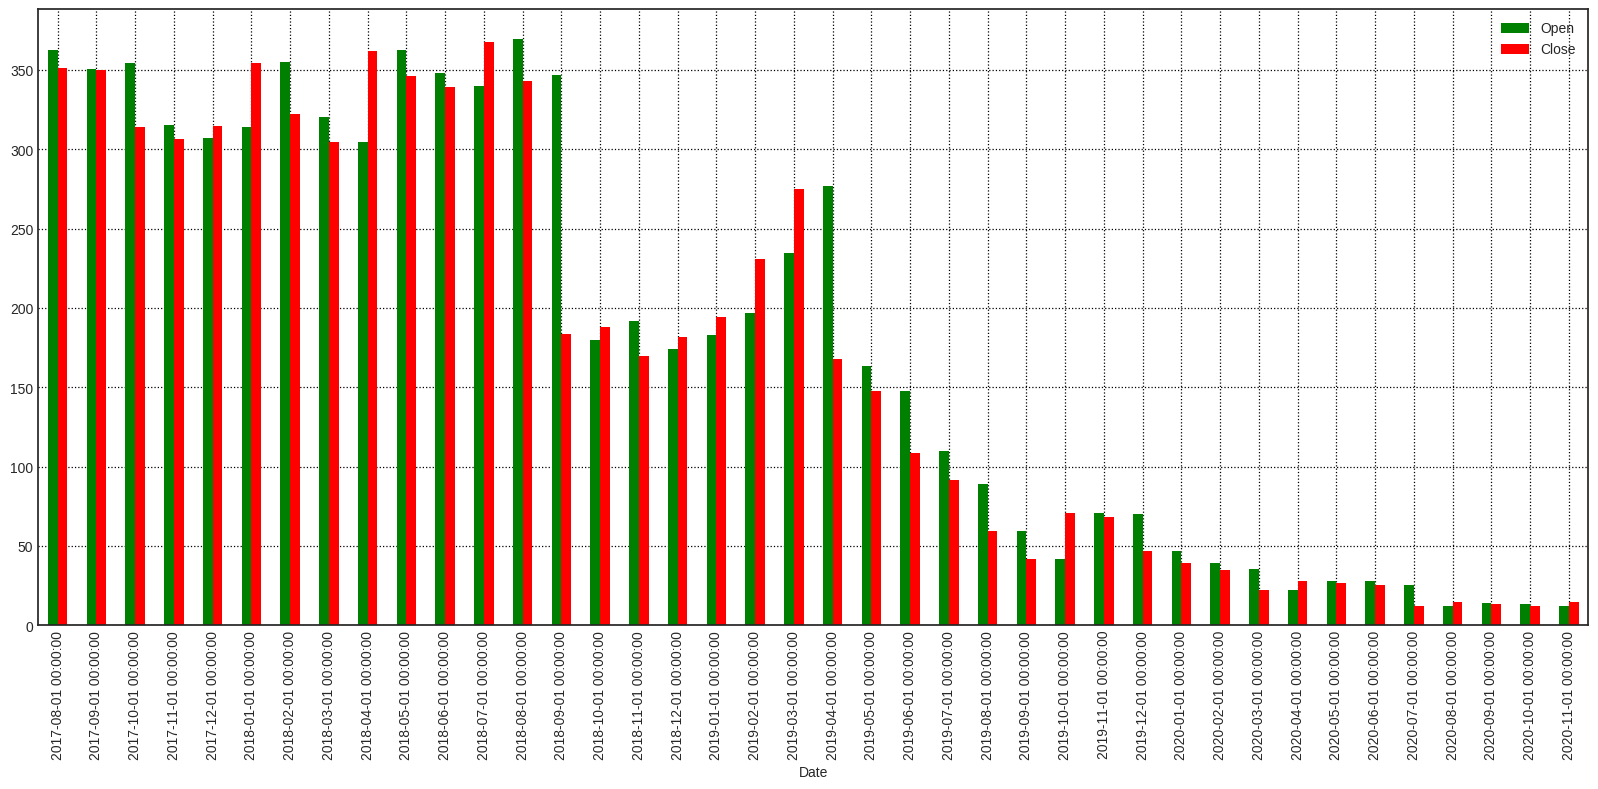

In [18]:
# Chart - 3 visualization code
df[['Open','Close']].tail(40).plot(kind='bar',color=("green","red"),figsize=(20,8))
plt.grid(which='major', linestyle=':', linewidth='0.9', color='black')
plt.grid(which='minor', linestyle='-', linewidth='0.9', color='red')
plt.show()

##### 1. Why did you pick the specific chart?

Fo checking the openning price and closing price togather of every date

##### 2. What is/are the insight(s) found from the chart?

*   Here from the above graph we can conclude the point that the stock price of the YES BANK falls down after the year 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* It is not beneficial for investors to invest their money.

#### Chart - 4

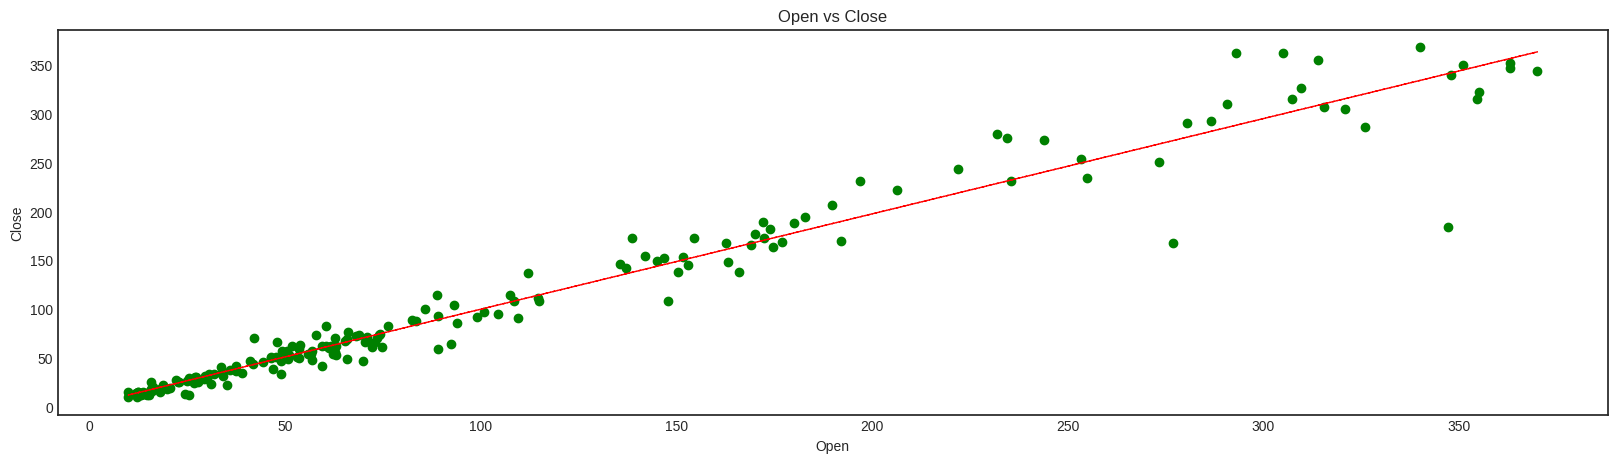

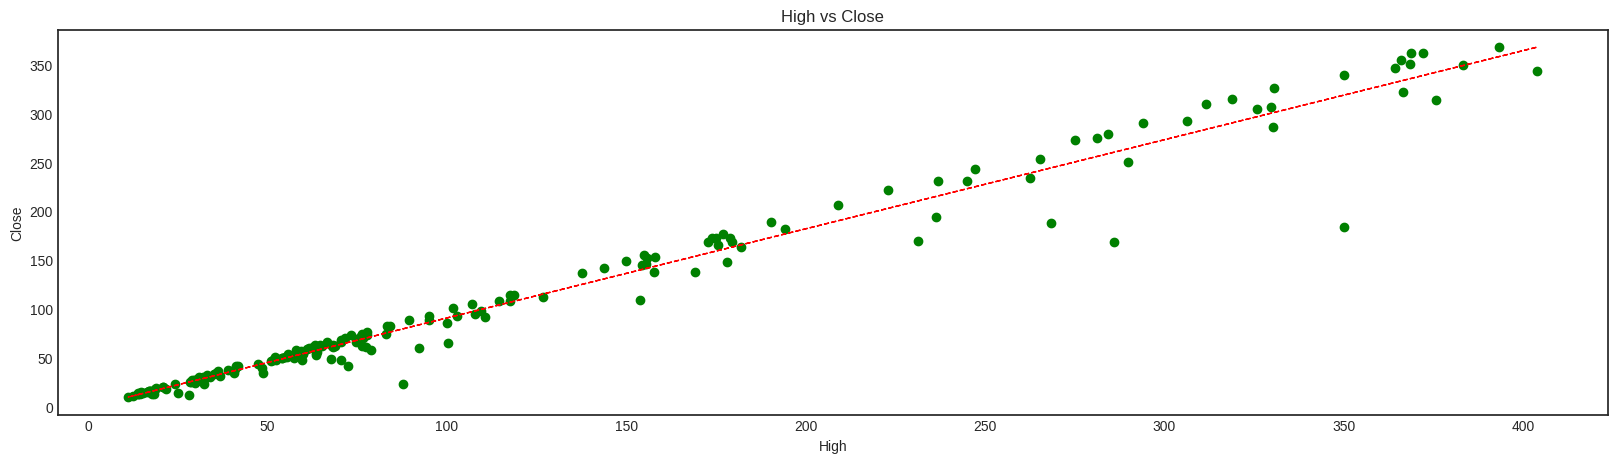

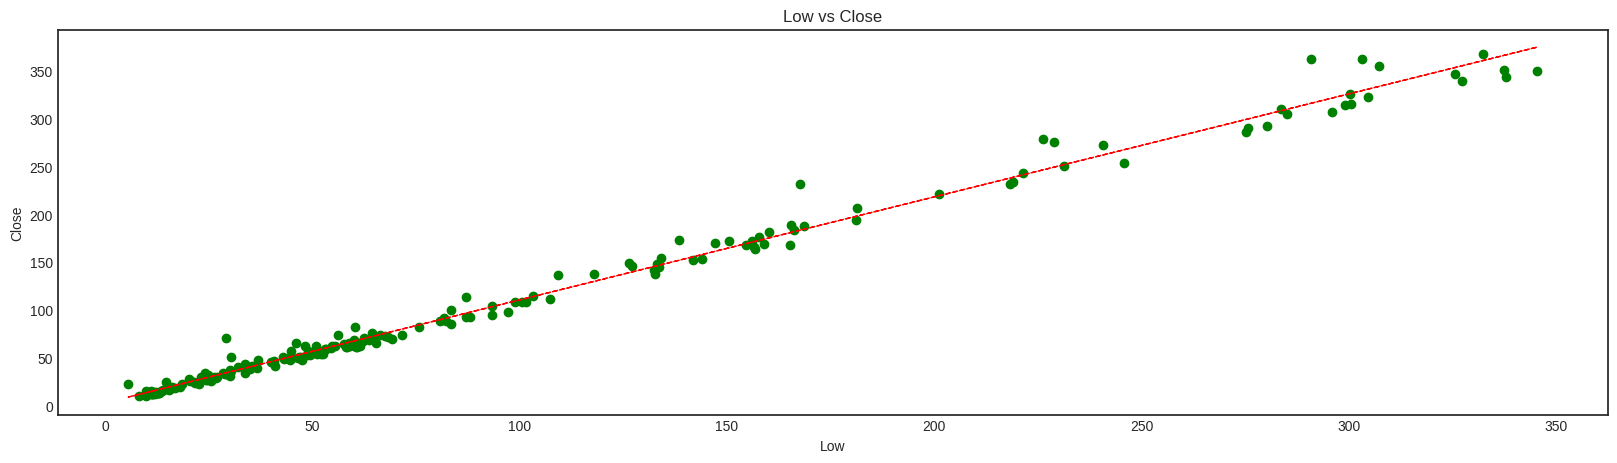

In [19]:
# Chart - 4 visualization code

for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(df[col], df['Close'], color="green")
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.show()

##### 1. Why did you pick the specific chart?

* To see the relationship between dependent & independent variables

##### 2. What is/are the insight(s) found from the chart?

*  In all above scatter plots we can conclude that bivariate analysis shows high correlation of close price with other features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*-

#### Chart - 5

<Figure size 1500x1000 with 0 Axes>

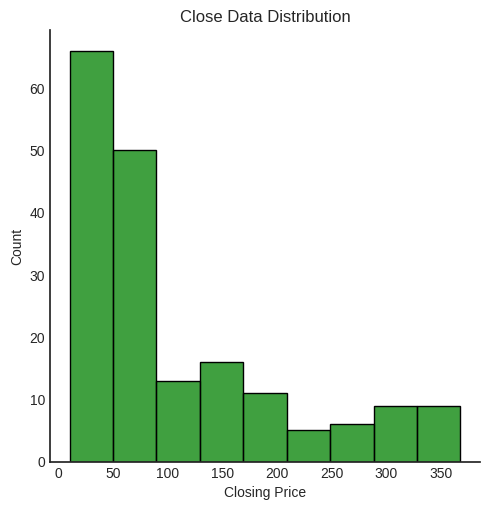

In [20]:
# Chart - 5 visualization code
fig=plt.figure(figsize=(15,10))
sns.displot(df['Close'],color="green")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

* For checking the histogram an skewness of closing price.

##### 2. What is/are the insight(s) found from the chart?

* It is right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

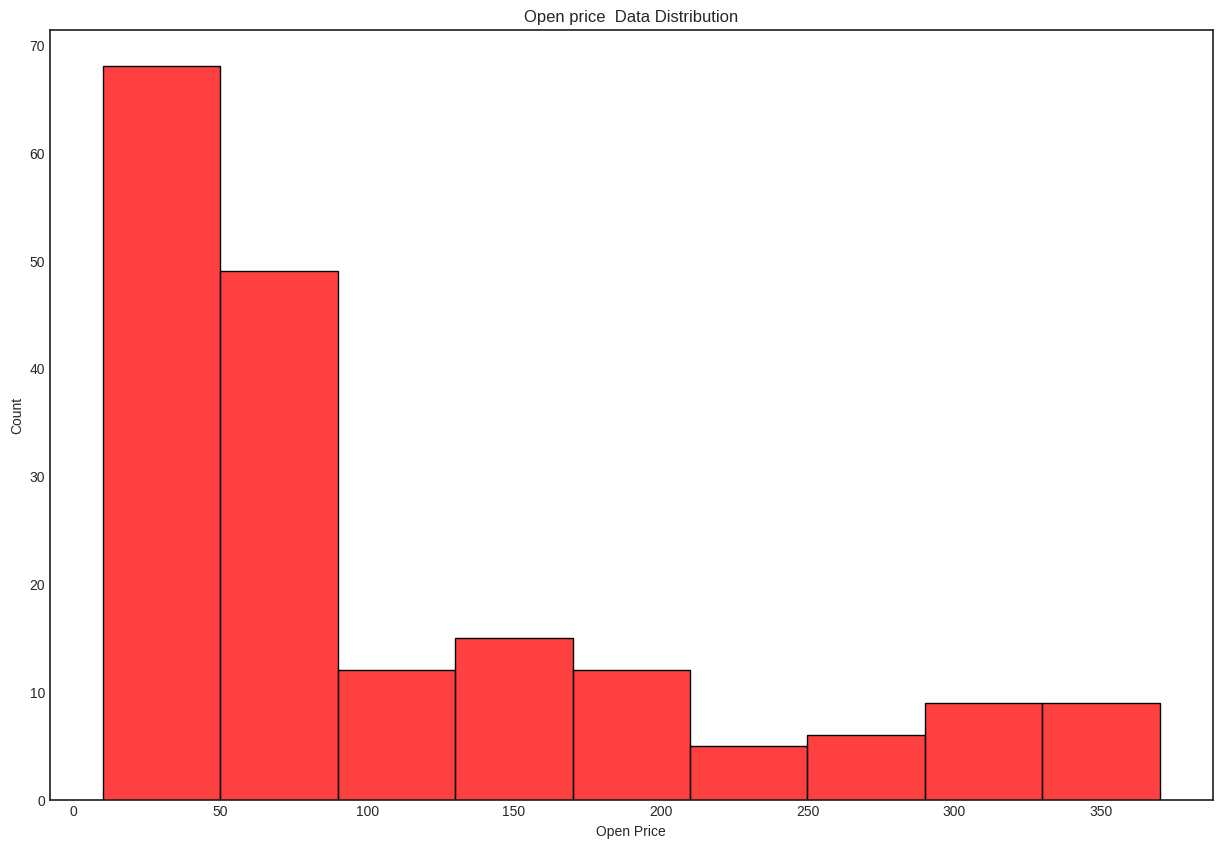

In [21]:
# Chart - 6 visualization code
plt.figure(figsize=(15,10))
sns.histplot(df['Open'],color="r")
plt.title('Open price  Data Distribution')
plt.xlabel('Open Price')
plt.show()

##### 1. Why did you pick the specific chart?

* For checking the histogram and skewness of open price

##### 2. What is/are the insight(s) found from the chart?

* It is right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Figure size 1500x1000 with 0 Axes>

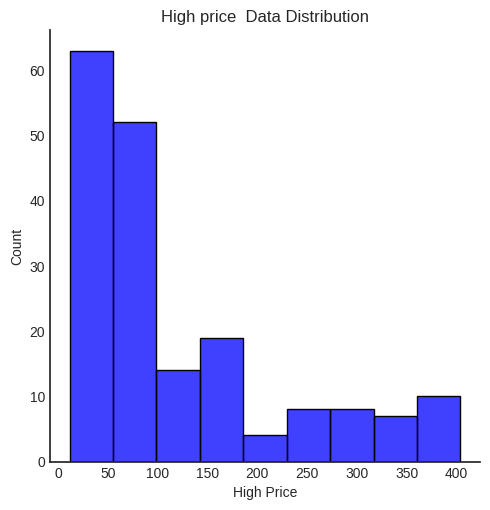

In [22]:
# Chart - 7 visualization code
plt.figure(figsize=(15,10))
sns.displot(df['High'],color="b")
plt.title('High price  Data Distribution')
plt.xlabel('High Price')
plt.show()

##### 1. Why did you pick the specific chart?

* For checking the histogram and skewness of high price

##### 2. What is/are the insight(s) found from the chart?

* It is right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

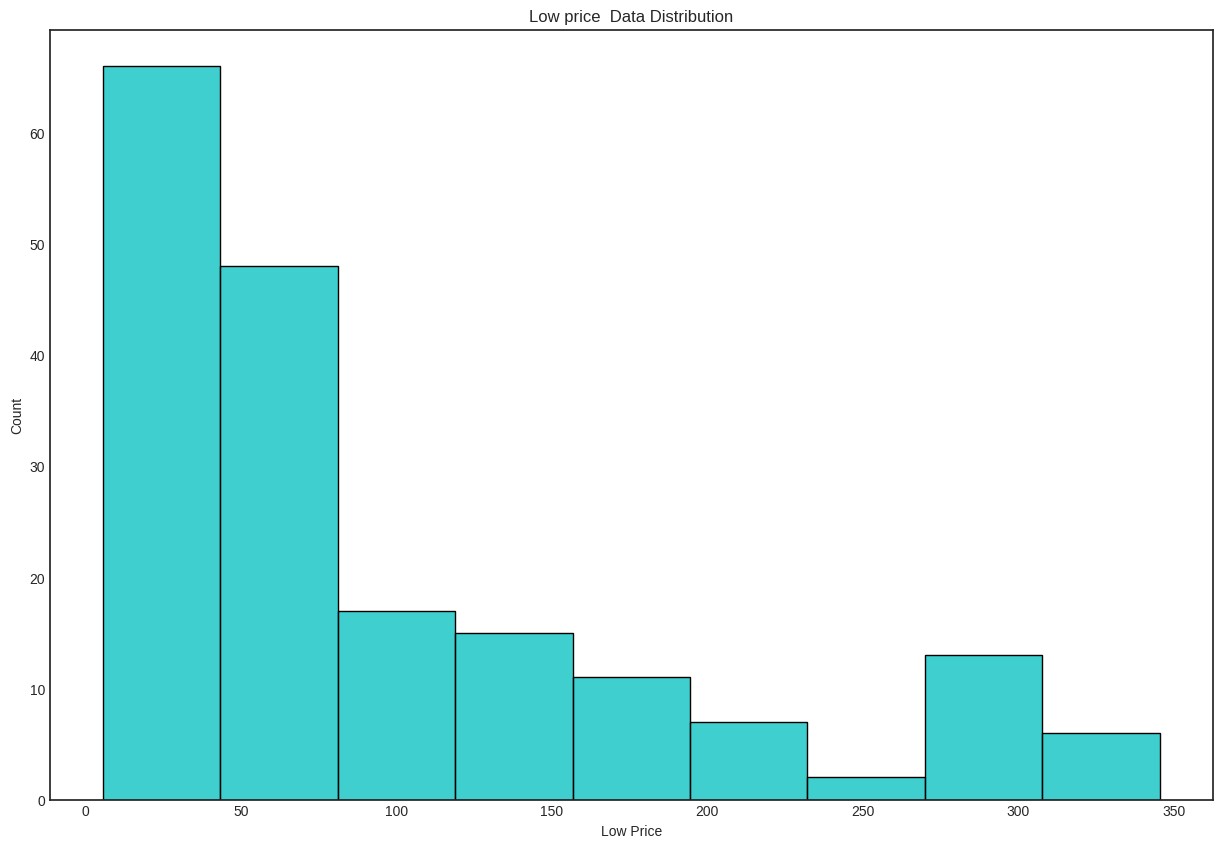

In [23]:
# Chart - 8 visualization code
plt.figure(figsize=(15,10))
sns.histplot(df['Low'],color="c")
plt.title('Low price  Data Distribution')
plt.xlabel('Low Price')
plt.show()

##### 1. Why did you pick the specific chart?

* For checking the histogram and skewness of low price

##### 2. What is/are the insight(s) found from the chart?

* It is also right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [24]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [25]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [26]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [27]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [28]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

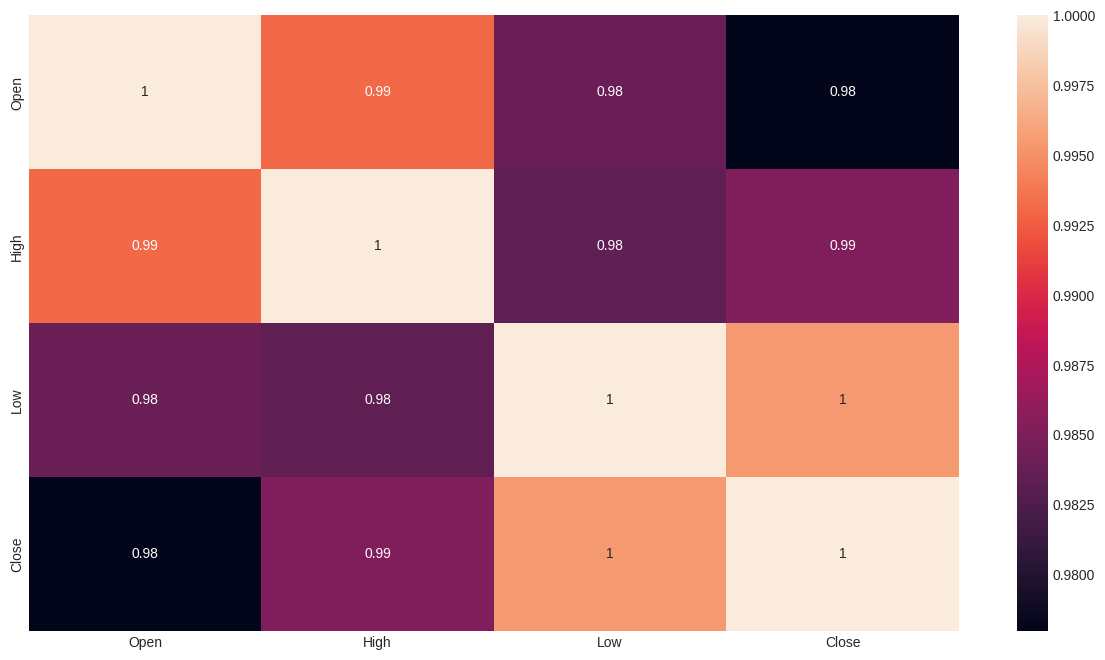

In [29]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot= True)

##### 1. Why did you pick the specific chart?

* For checking the correlation of the features

##### 2. What is/are the insight(s) found from the chart?

* Every feature is extremely corelated with each other,
so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

#### Chart - 15 - Pair Plot 

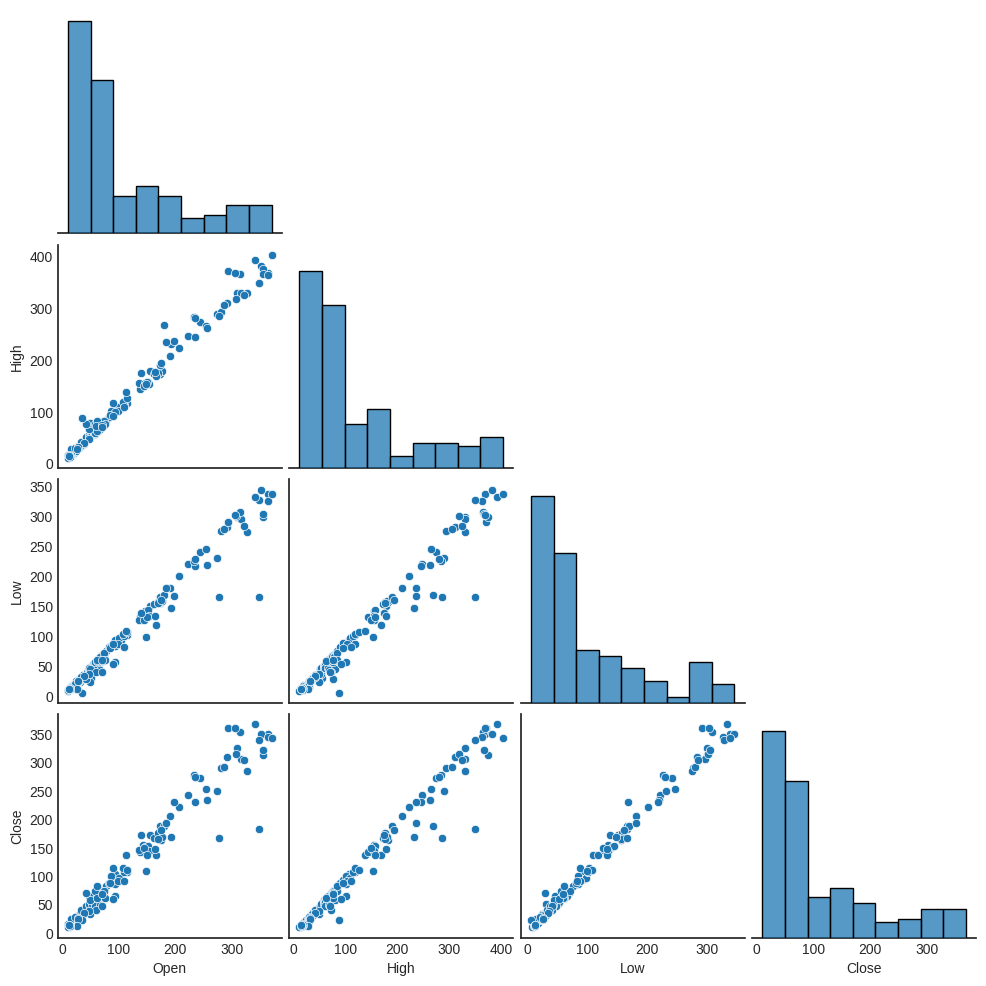

In [30]:
# Pair Plot visualization code
sns.pairplot(df, corner=True)

##### 1. Why did you pick the specific chart?

* Pairplot is a useful tool for visualizing patterns and relationships between variables in a dataset.
* In a pairplot, each variable is plotted against all other variables in the dataset, resulting in a grid of scatterplots.
* The diagonal of the grid shows the distribution of each variable, while the lower diagonal shows the scatterplots of the pairwise relationships between the variables. The upper diagonal is a mirror image of the lower diagonal, showing the same scatterplots, but with the axes flipped.
* Pairplots are useful for identifying patterns and relationships between variables, such as linear or nonlinear relationships, clusters, and outliers. They can also be used to identify which variables are strongly correlated with each other.

##### 2. What is/are the insight(s) found from the chart?

* The resulting plot will show scatterplots of each pair of features along with the distributions of each individual feature.

##### 3. Will the gained insights help creating a positive business impact?

* The insights gained from a pair plot can definitely help create a positive business impact. By identifying any patterns or relationships between variables, businesses can make more informed decisions and improve their operations.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

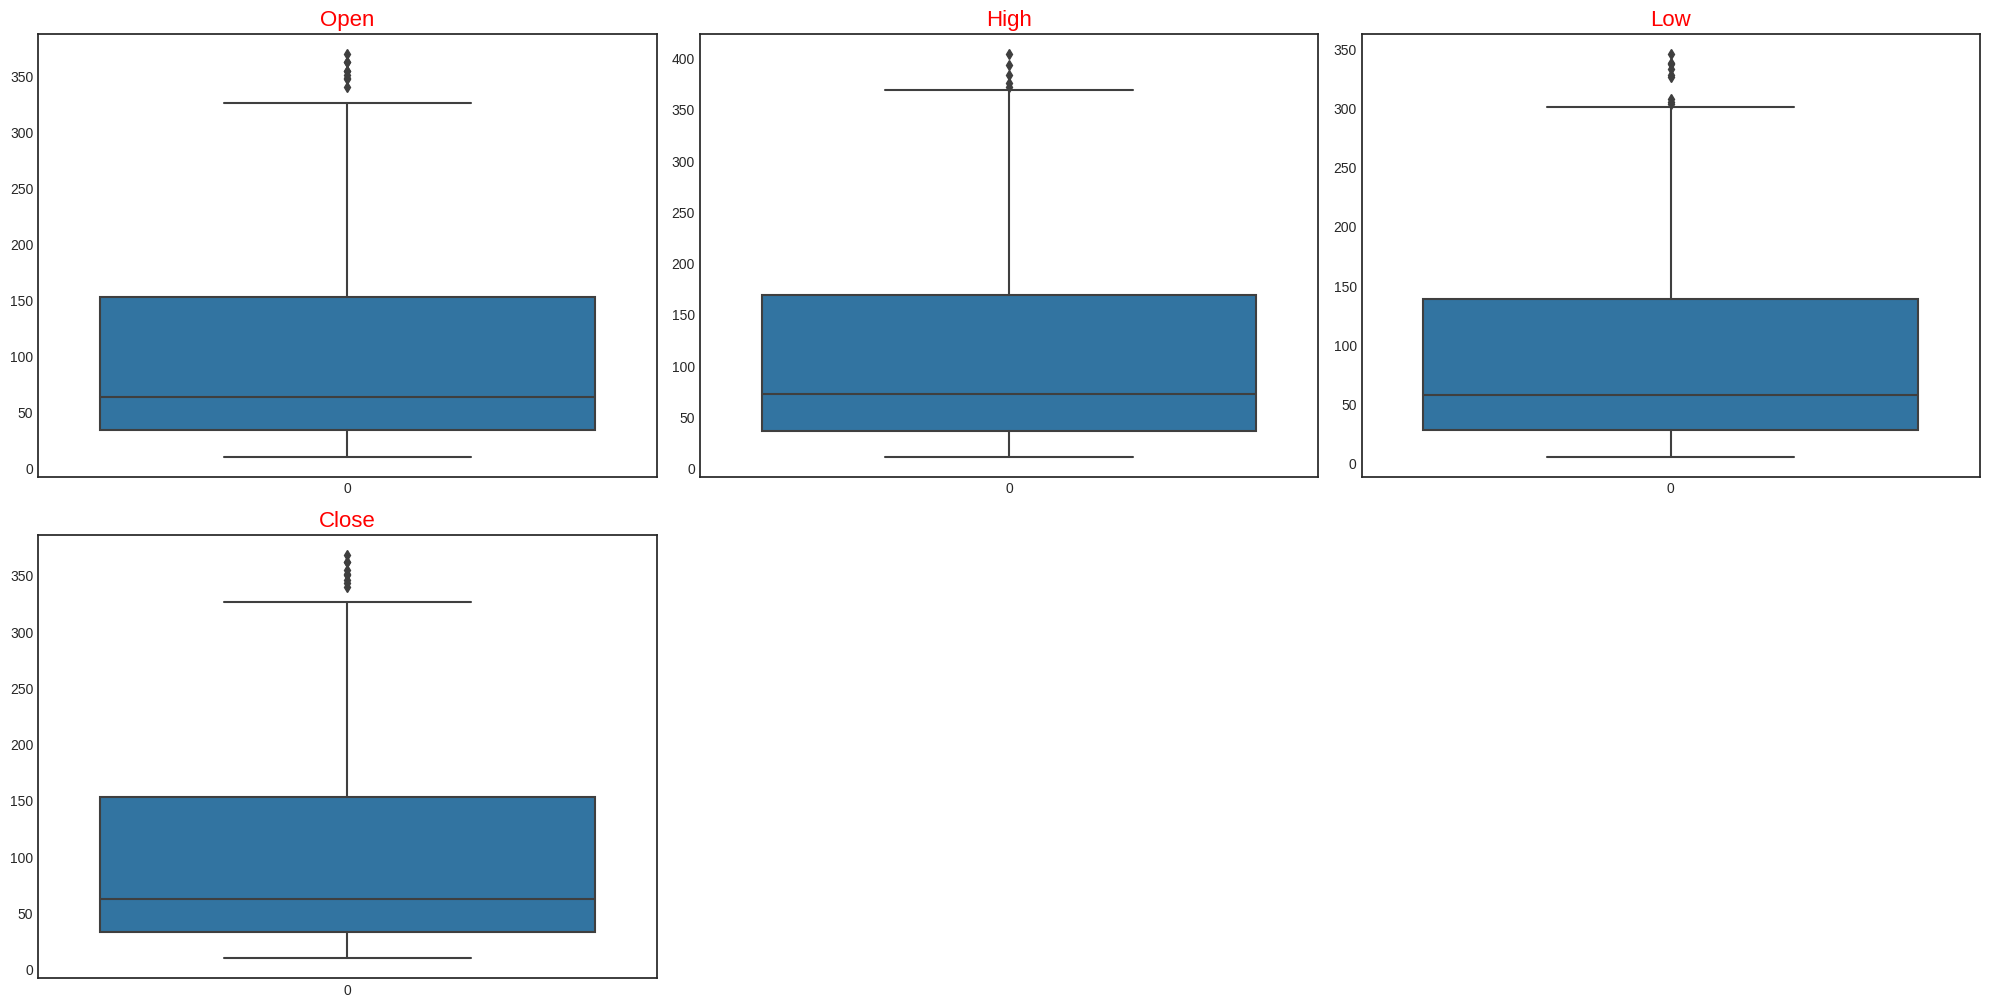

In [35]:
# Handling Outliers & Outlier treatments

num_col= df.select_dtypes(exclude='object')

# checking Outliers in numeric features using seaborn boxplot
plt.figure(figsize=(20,15))

for i,feature in enumerate(num_col):
  plt.subplot(3,3,i+1)
  sns.boxplot(df[feature])
  plt.title(feature, fontsize=16,color='red')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* It is not always necessary to remove outliers from a dataset, especially if the data is continuous and represents real-world measurements.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns
num_col= num_col
cat_col=df.select_dtypes(include='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

#### 2. Lower Casing

In [38]:
# Lower Casing

#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [41]:
# Remove Stopwords

In [42]:
# Remove White spaces

#### 6. Rephrase Text

In [43]:
# Rephrase Text

#### 7. Tokenization

In [44]:
# Tokenization

#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [46]:
# POS Taging

#### 10. Text Vectorization

In [47]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Open,High,Low,Close,OHL
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37


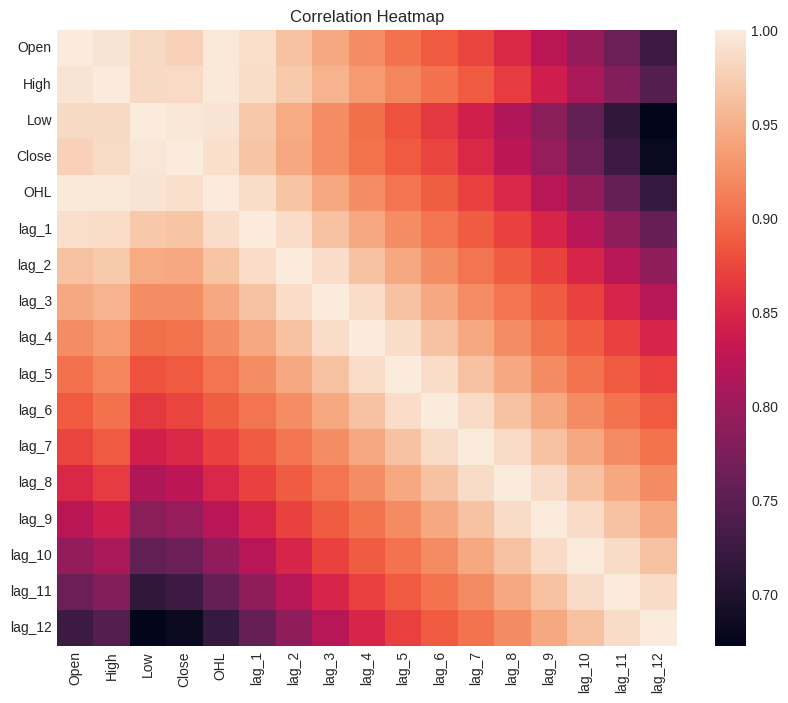

In [49]:
# use lags as additional features
for i in range(1, 13):
    df["lag_{}".format(i)] = df.OHL.shift(i) 
# correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

#### To reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model. This is a good solution when each predictor contributes to predict the dependent variable.

#### 2. Feature Selection

In [50]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# Transform Your data

# Creating data of independent variables
x = df[['Open', 'High', 'Low']]

# Creating dependent variable data
y = df["Close"]


### 6. Data Scaling

In [56]:
# Scaling your data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [57]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1)


In [59]:
X_train[:,0]
#Looking for shapes of trainig and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [ ]:
# choose appropriate dependent and independent variables


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [60]:
# ML Model - 1 Implementation
# initialize and fit linear regression
lr_model = LinearRegression()

# Fit the Algorithm
lr_model.fit(X_train, y_train)

# Predict on the model
y_pred = lr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

print('Coefficients: ', lr_model.coef_)
print('intercept:', lr_model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("R2 score : %.2f" % lr_model.score(x_scaled,y))
print('Variance score: {}'.format(lr_model.score(X_test, y_test)))

# Let's use the handy function we created
def adj_r2(x,y):
    r2 = lr_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adjusted_R2 = adj_r2(x_scaled,y)
print('adjusted R2:',adjusted_R2)


Coefficients:  [-48.92503273  55.72617649  90.92160437]
intercept: 105.03330694721613
Mean squared error: 19.99
R2 score : 1.00
Variance score: 0.9978412541225983
adjusted R2: 0.9949781468214299


*   R-squared is the proportion of the variance in the response variable that can be explained by the predictor variables in a linear regression model.
*   The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable while a value of 1 indicates that the response variable can be perfectly explained without error by the predictor variables.


*   The adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors in a regression model.
*   Adjusted R2 valu increases when we use valuable feature and decreases when we use not relevant feature.

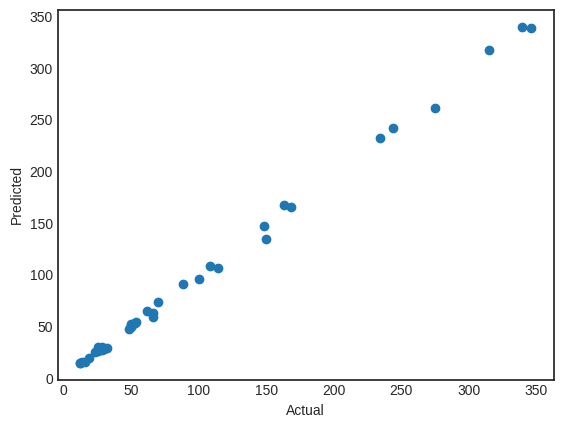

In [66]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

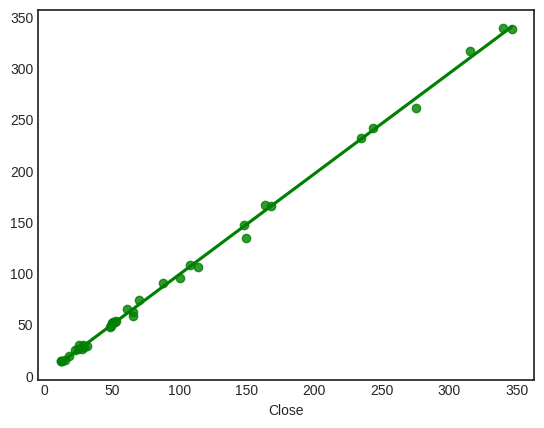

In [70]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

**RESIDUAL PLOT**

We are ploting residual plot to evaluate the goodness of our fit for our regression model.

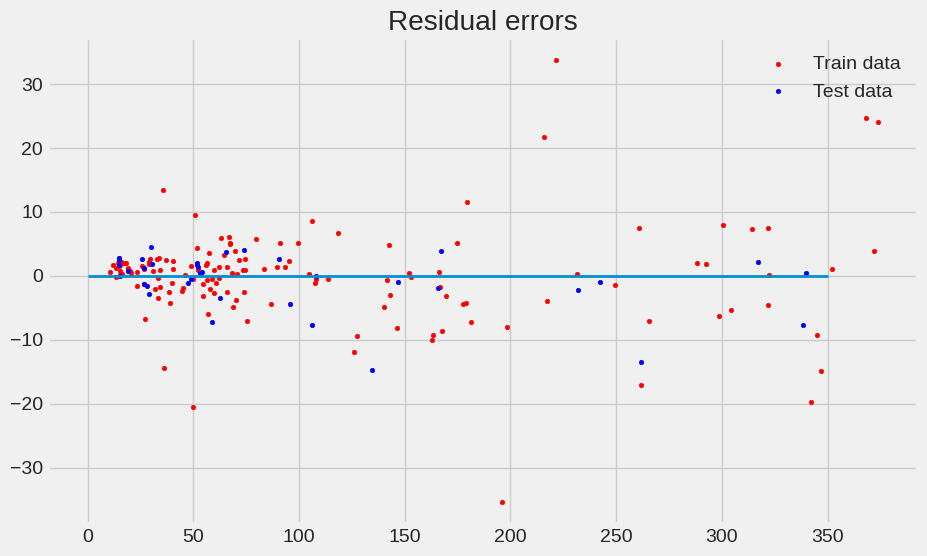

In [71]:
plt.style.use('fivethirtyeight')
  
plt.figure(figsize=(10,6))
# plotting residual errors in training data
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Train data')
  
# plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 350, linewidth = 2)
  

plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

*  A residual is a measure of how far away a point is vertically from the regression line. It is the error between a predicted value and the observed actual value.



*   Here, in this residual plot it has a high density of points close to the origin and a low density of points away from the origin and also it is symmetric about the origin.



*   This linear model is a good fit for relatively small x-value,but is not a good predictor of larger x-values.


#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [75]:
# ML Model - 2 Implementation
lasso  = Lasso(alpha=0.010 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_l = lasso.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))

MSE : 20.214848381869473
RMSE : 4.496092568205138
MAE : 3.073530700265413
R2 : 0.9978168172187769


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

*  So the conclusion, the R squared value for the test data was 99.7%. This is almost same as in the score from the training dataset which proves that in a dataset we achieve the best fit model.

### ML Model - 3

In [81]:
from sklearn.linear_model import Ridge
# ML Model - 3 Implementation
ridge  = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_pred_r = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

MSE : 29.595509126508347
RMSE : 5.440175468356545
MAE : 3.6721812916399585
R2 : 0.9968037155309819


#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)



In [87]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 20.06685135300319
RMSE : 4.4796039281395394
MAE : 3.058968183477561
R2 : 0.9978328007452911


**PERFORMANCE VISUALIZATION**

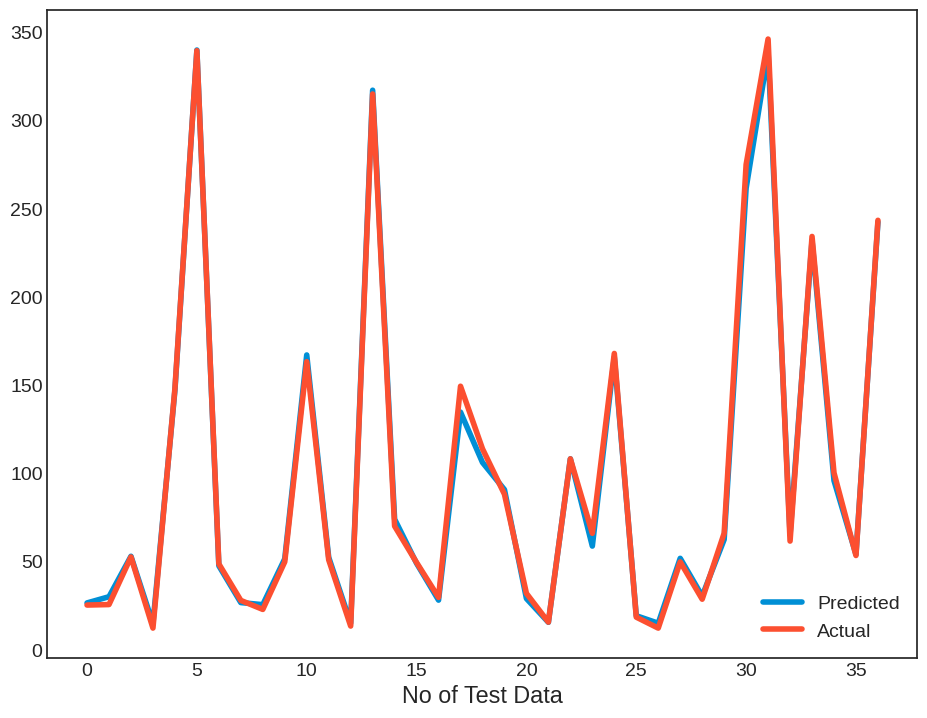

In [95]:
#Linear regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

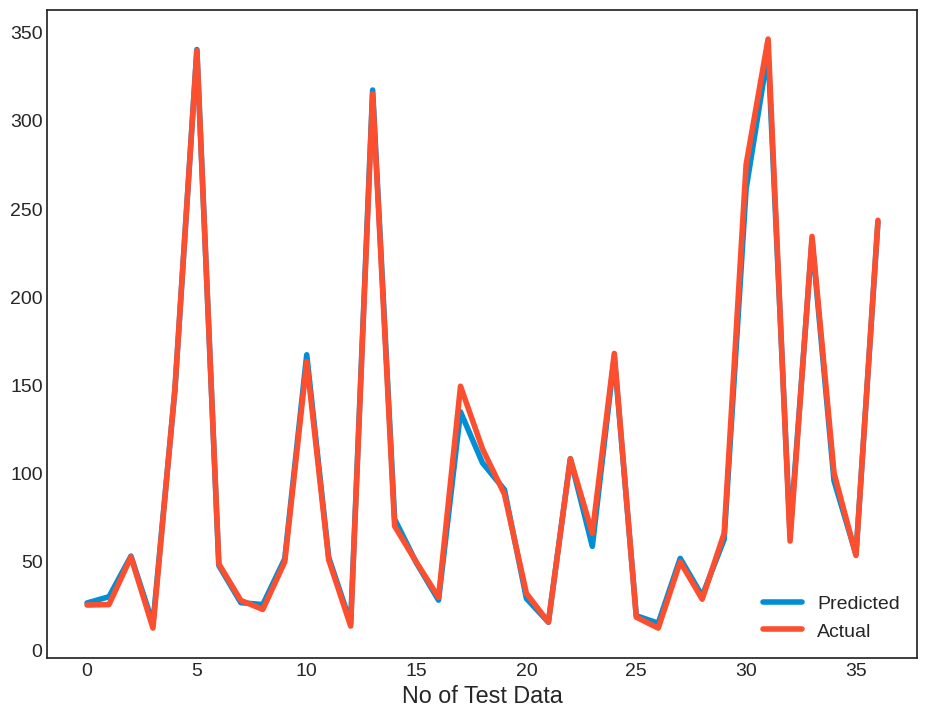

In [94]:
#Lasso regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred_l)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

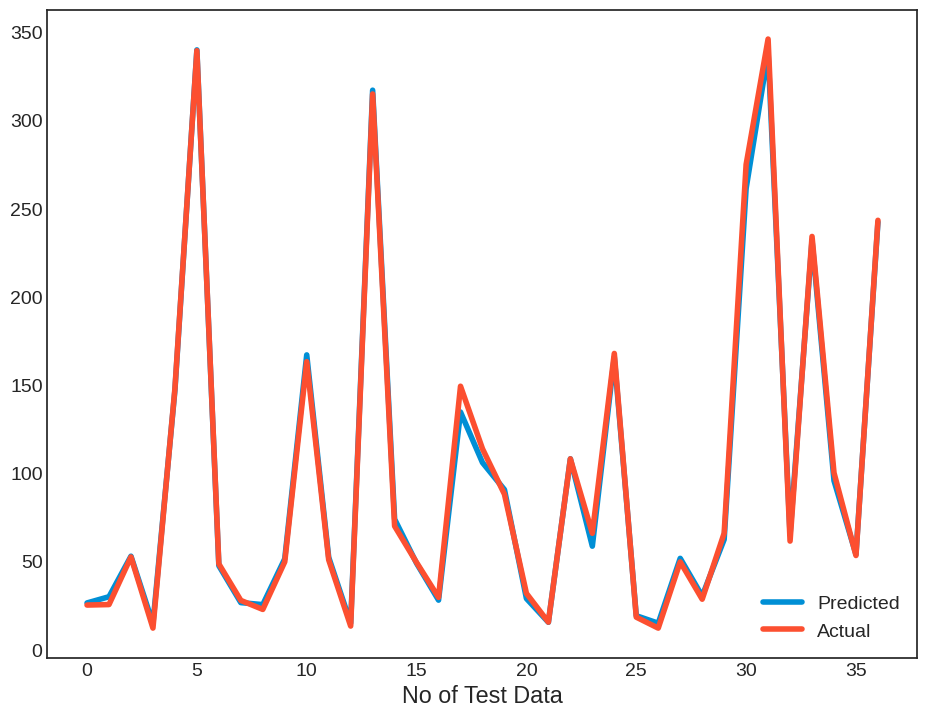

In [96]:

#Lasso regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***